#TASK3
####DATA PREPROCESSING
The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

In [1]:
import pandas as pd

In [3]:
#loading given dataset
df=pd.read_csv("//content/Employee (ML task 3).csv")

In [4]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [7]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [8]:
#List Unique Values and Their Lengths
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")
    print(f"Number of unique values in {column}: {df[column].nunique()}")

Unique values in Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of unique values in Company: 6
Unique values in Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of unique values in Age: 29
Unique values in Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of unique values in Salary: 40
Unique values in Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of unique values in Place: 11
Unique values in Country: ['India']
Number of unique values in Country: 1
Unique values in Gender: [0 1]
Number of unique values in Gender: 2


In [9]:
# Renaming columns (if necessary)
df.rename(columns={'old_name': 'new_name'}, inplace=True)

# Statistical analysis (e.g., mean, median)
print(df.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


#Data cleaning

#### Handling Missing values
######Replace 0 in the age column with NaN and then address missing values.


In [10]:
import numpy as np

# Replace 0 with NaN in 'age' column
df['Age'].replace(0, np.nan, inplace=True)

# Check for missing values
print(df.isnull().sum())

# Handle missing values
df.fillna({
    'Age': df['Age'].median(),  # Example: replace NaN in 'age' with median
    'Salary': df['Salary'].mean(),  # Example: replace NaN in 'salary' with mean
    # Add other columns as needed
}, inplace=True)


Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [11]:
#remove duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
#Finding Outliers
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers: {len(outliers)}")

# Remove outliers
df = df[~df.index.isin(outliers.index)]

Number of outliers: 0


####Data Analysis:
##### 1.Filter the data with age >40 and salary<5000
##### 2.Plot the chart with age and salary
##### 3.Count the number of people from each place and represent it visually

In [13]:
#Filter Data
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

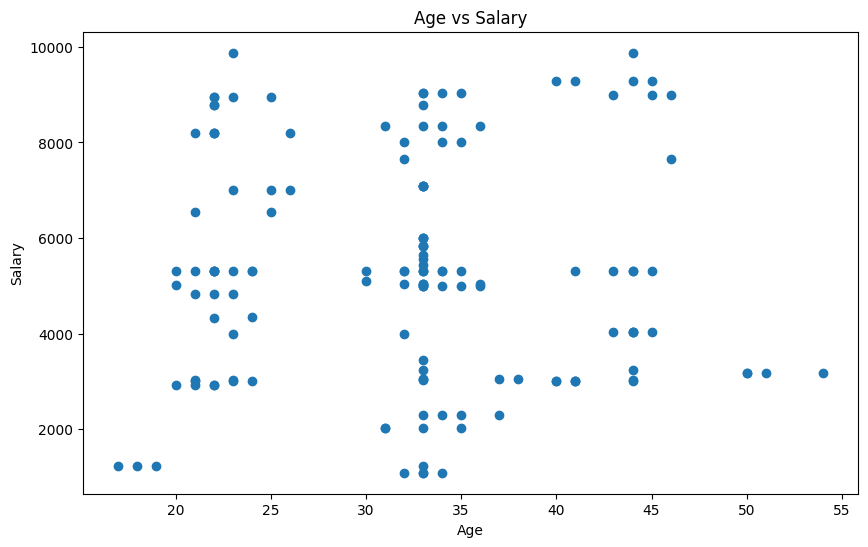

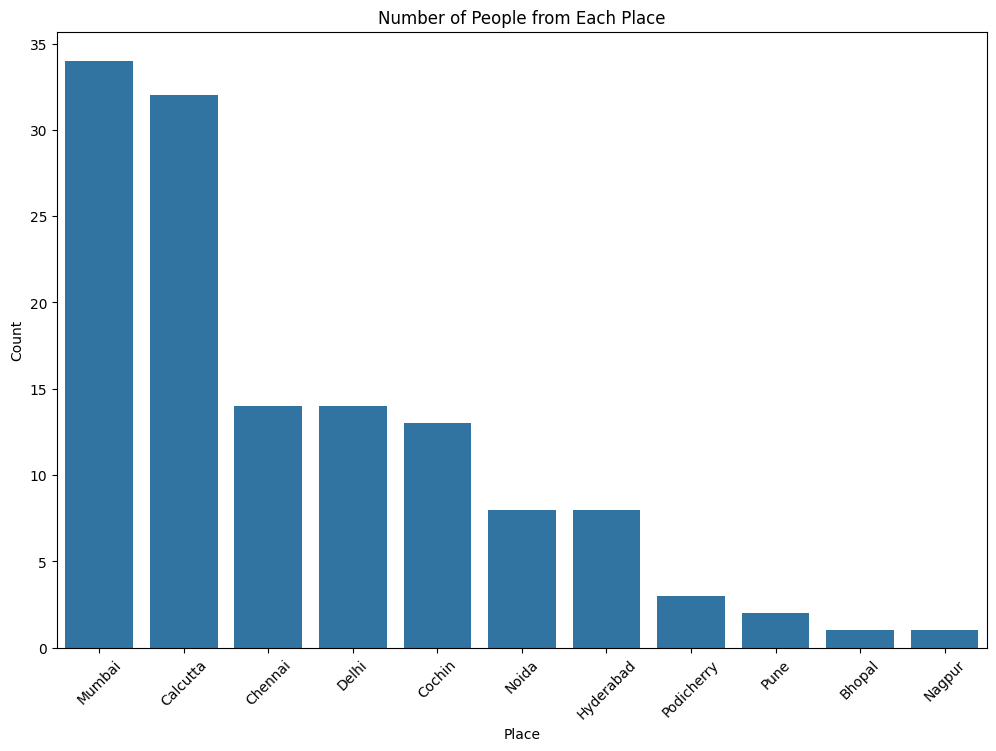

In [14]:
#plot chart
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age vs salary
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

# Count people from each place and visualize
place_counts = df['Place'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of People from Each Place')
plt.xticks(rotation=45)
plt.show()


Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [15]:
#Convert categorical variable
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Example using Label Encoding
label_encoder = LabelEncoder()
df['Place'] = label_encoder.fit_transform(df['Place'])

# Example using One-Hot Encoding
df = pd.get_dummies(df, columns=['Place'])


In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define features
features = ['Age', 'Salary']  # Add other features as needed

# Standard Scaling
standard_scaler = StandardScaler()
df[features] = standard_scaler.fit_transform(df[features])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df[features] = minmax_scaler.fit_transform(df[features])


In [17]:
df

,Company,Age,Salary,Country,Gender,Place_0,Place_1,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10,Place_11
0,TCS,0.081081,0.480650,India,0,False,False,True,False,False,False,False,False,False,False,False,False
1,Infosys,0.351351,0.480650,India,0,False,False,False,False,False,False,True,False,False,False,False,False
2,TCS,0.486486,0.137817,India,0,False,True,False,False,False,False,False,False,False,False,False,False
3,Infosys,0.621622,0.217480,India,0,False,False,False,False,True,False,False,False,False,False,False,False
4,TCS,0.162162,0.331285,India,0,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,0.135135,0.809491,India,0,False,False,False,False,False,False,True,False,False,False,False,False
143,TCS,0.432432,0.903039,India,1,False,True,False,False,False,False,False,False,False,False,False,False
145,Infosys,0.729730,0.335154,India,1,False,False,False,False,True,False,False,False,False,False,False,False
146,TCS,0.432432,0.448959,India,1,False,False,False,False,False,False,True,False,False,False,False,False
